# Grayscale Detection

### Tools used:
- OpenCV
- Numpy
- Matplotlib

### Explaination:
I have divided image into 3 channels (r,g,b) and taken the sum of  difference between each channel. If given image belongs to the grayscale category, sum will be zero. If not it, contains some amount of colour. Next, we calculate percentage of grayscale. This is done by finding the ratio of the sum (calculated above) to the image size. This will give is the colour percentage, hence, for grayscale we subtract it from one. 

In [8]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [20]:
def checkGrayscale(img):
    r,g,b=cv2.split(img)
    rg=np.count_nonzero(abs(r-g))
    rb=np.count_nonzero(abs(r-b))
    gb=np.count_nonzero(abs(g-b))
    sum=float(rg+rb+gb)
    ratio=sum/img.size
    if ratio>0.005:
        label='colored image'
    else: 
        label='greyscale'
        
    return label,ratio
    

In [6]:
def show_image(x):
    plt.imshow(x)

colored image
percentage grayscale :  1.057942708333337


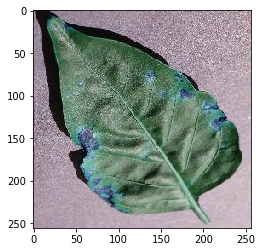

In [24]:
# test 1

image=cv2.imread('test.jpg')
show_image(image)
label,ratio=checkGrayscale(image)
print (label)
print ("percentage grayscale : ",((1-ratio)*100))

greyscale
percentage grayscale :  100.0


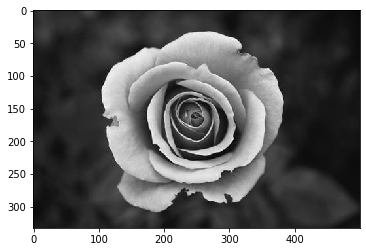

In [25]:
# test 2

image=cv2.imread('test1.jpeg')
show_image(image)
label,ratio=checkGrayscale(image)
print (label)
print ("percentage grayscale : ",((1-ratio)*100))

colored image
percentage grayscale :  56.225260416666664


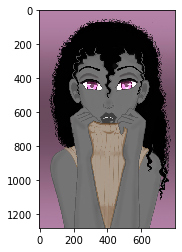

In [26]:
# test 3

image=cv2.imread('test2.jpg')
show_image(image)
label,ratio=checkGrayscale(image)
print (label)
print ("percentage grayscale : ",((1-ratio)*100))

greyscale
percentage grayscale :  100.0


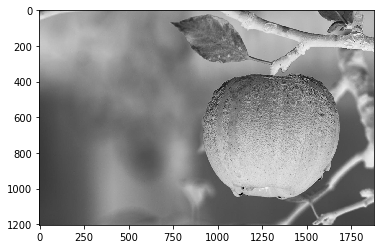

In [28]:
# test 4

image=cv2.imread('test3.jpg')
show_image(image)
label,ratio=checkGrayscale(image)
print (label)
print ("percentage grayscale : ",((1-ratio)*100))

# Convolutional Neural Network Classification 

### Tools used:
- Keras
- Numpy

### Explanation
Here I have used a small custom dataset using google to simply classify if it's a coloured image or a grayscale image.  Here we ahve used a 3 layer convolutional neural network to train the model. Test cases are given below.

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\Iishi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Iishi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Iishi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Iishi\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [3]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('grayscaleDetectionDataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('grayscaleDetectionDataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 40 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [5]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 40,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 8)


Epoch 1/5
40/40 [==============================] - 7s 174ms/step - loss: 0.1852 - accuracy: 0.9038 - val_loss: 0.7220 - val_accuracy: 0.8750
Epoch 2/5
40/40 [==============================] - 7s 169ms/step - loss: 0.0085 - accuracy: 0.9987 - val_loss: 0.3163 - val_accuracy: 0.8750
Epoch 3/5
40/40 [==============================] - 7s 170ms/step - loss: 6.4510e-04 - accuracy: 1.0000 - val_loss: 0.5760 - val_accuracy: 0.8750
Epoch 4/5
40/40 [==============================] - 7s 177ms/step - loss: 3.1724e-04 - accuracy: 1.0000 - val_loss: 0.6615 - val_accuracy: 0.8750
Epoch 5/5
40/40 [==============================] - 7s 173ms/step - loss: 1.9488e-04 - accuracy: 1.0000 - val_loss: 0.6463 - val_accuracy: 0.7500


### TEST 1

grayscale


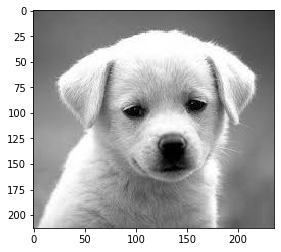

In [16]:
import numpy as np
from keras.preprocessing import image

test=image.load_img('grayscaleDetectionDataset/test/grayscale/3.JPG',target_size = (64, 64))
test=image.img_to_array(test)
test=np.expand_dims(test, axis=0)

result=classifier.predict(test)
if result[0][0]==0:
    print ('colored')
else:
    print ('grayscale')
image=cv2.imread('grayscaleDetectionDataset/test/grayscale/3.JPG')
show_image(image)

### TEST 2

colored


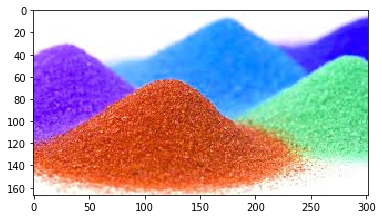

In [14]:
import numpy as np
from keras.preprocessing import image

test=image.load_img('grayscaleDetectionDataset/test/colored/2.JPG',target_size = (64, 64))
test=image.img_to_array(test)
test=np.expand_dims(test, axis=0)

result=classifier.predict(test)
if result[0][0]==0:
    print ('colored')
else:
    print ('grayscale')
image=cv2.imread('grayscaleDetectionDataset/test/colored/3.JPG')
show_image(image)

### TEST 3

grayscale


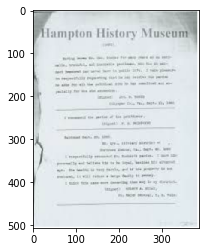

In [15]:
import numpy as np
from keras.preprocessing import image

test=image.load_img('grayscaleDetectionDataset/1.PNG',target_size = (64, 64))
test=image.img_to_array(test)
test=np.expand_dims(test, axis=0)

result=classifier.predict(test)
if result[0][0]==0:
    print ('colored')
else:
    print ('grayscale')
image=cv2.imread('grayscaleDetectionDataset/1.PNG')
show_image(image)